In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv(r'D:\clv\data\final_data.csv')
df.set_index('CustomerID', inplace=True)

In [11]:
df.head()
df.columns

Index(['TotalQty', 'AvgUnitPrice', 'Monetary_Value', 'CLV_target_3M'], dtype='object')

## Visualing the main 3 features

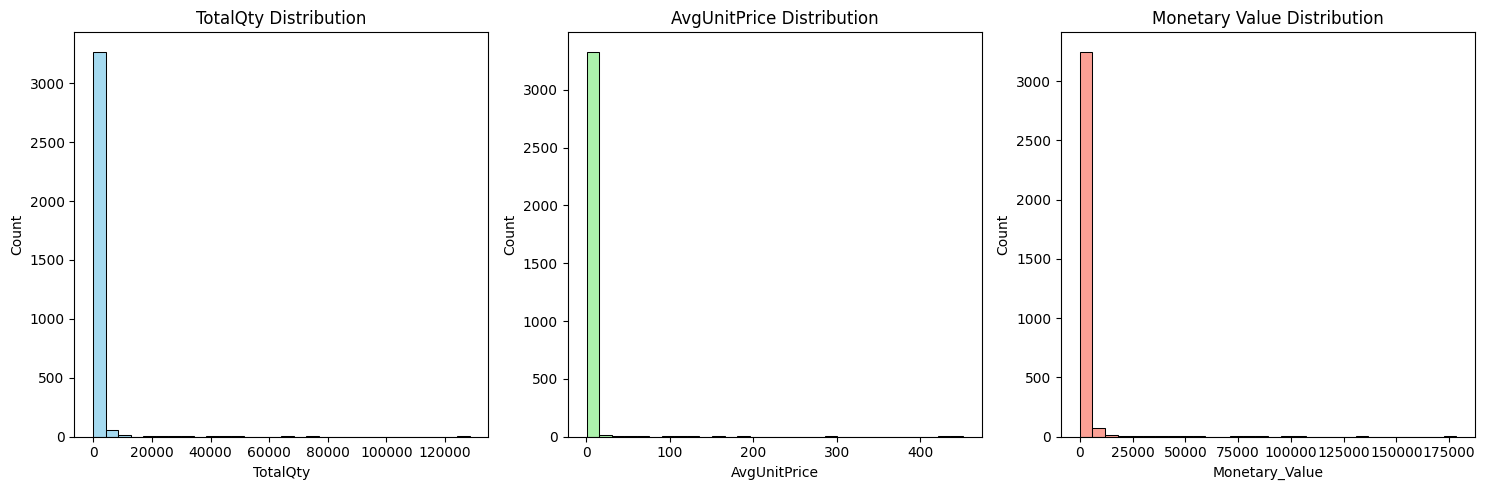

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting TotalQty, AvgUnitPrice and Monetary Value
sns.histplot(df['TotalQty'], bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('TotalQty Distribution')

sns.histplot(df['AvgUnitPrice'], bins=30, ax=axes[1], color='lightgreen')
axes[1].set_title('AvgUnitPrice Distribution')

sns.histplot(df['Monetary_Value'], bins=30, ax=axes[2], color='salmon')
axes[2].set_title('Monetary Value Distribution')

plt.tight_layout()
plt.show()

### Observation: the TotalQty and Monetary are heavily Right Skewed , and AvgUnitPrice is also skewed towards right.

# Correlation Matrix

In [9]:
corr_matrix = df.corr()

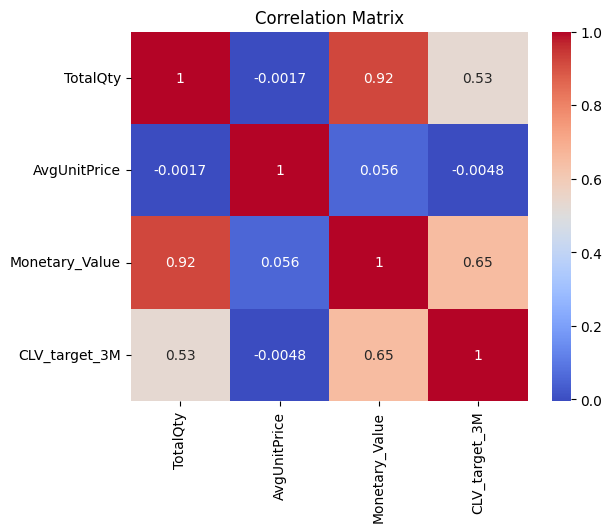

In [10]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Observation : the Monetary value is highly correlated to ClV

# Train/Test Split

In [12]:
X = df[['TotalQty', 'AvgUnitPrice', 'Monetary_Value']]
y = df["CLV_target_3M"]

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((2692, 3), (673, 3))

In [15]:
import joblib as jb
import os

save_path = 'D:\clv\model_data'


jb.dump(X_train, os.path.join(save_path, 'X_train.pkl'))
jb.dump(X_test, os.path.join(save_path, 'X_test.pkl'))
jb.dump(y_train, os.path.join(save_path, 'y_train.pkl'))
jb.dump(y_test, os.path.join(save_path, 'y_test.pkl'))

['D:\\clv\\model_data\\y_test.pkl']